In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_ice = pd.read_csv('../../data/chapter01/icecream.csv')

In [3]:
df_ice.head()

,year,month,expenditure_yen
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632


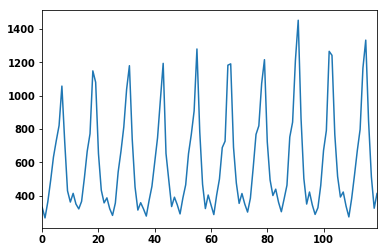

In [4]:
df_ice.expenditure_yen.plot()

In [5]:
# 移動平均
df_ma = df_ice.expenditure_yen.rolling(window=12).mean().shift(-6)
# 中心化移動平均
df_cma = df_ma.rolling(window=2).mean()

In [8]:
# 原系列(df_ice.expenditure_yen)/中心化移動平均系列(df_cma) 
df_orig_div_cma = df_ice.expenditure_yen / df_cma

# 月毎に加算
orig_div_cma = df_orig_div_cma.values
s_index = np.zeros(12)
counter = np.zeros(12, dtype='i')
for idx in range(len(orig_div_cma)//12):
    # 12ヶ月ごとにデータを抽出
    cut_orig_div_cma = orig_div_cma[idx*12:(idx+1)*12]
    mask = cut_orig_div_cma!=cut_orig_div_cma
    # numpy.whereを使用して非数(nan)を0にして加算する
    counter += np.where(mask, 0, 1)
    s_index += np.where(mask, 0, cut_orig_div_cma)

# 加算結果の各月平均
s_index /= counter
# 全体を1200に合わせ季節指数を計算
s_index = s_index / s_index.sum() * 1200
s_index

array([ 57.05374632,  48.4935788 ,  61.87100094,  82.34066594,
       112.21945388, 129.50185932, 178.03993789, 201.78512364,
       122.39560152,  79.21403276,  59.2923283 ,  67.79267067])

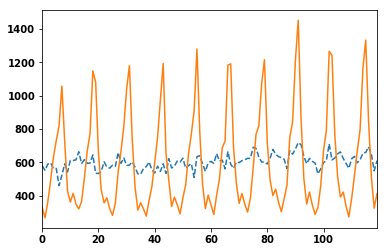

In [9]:
# 季節指数を原系列の要素と対応させる
# 原系列のスタートが1月なのでtileして12ヶ月分の季節指数を繰り返すだけで良い
tiled_s_index = np.tile(s_index, len(orig_div_cma)//12)

# 季節調整済み系列の計算
df_adjusted_series = df_ice.expenditure_yen / tiled_s_index * 100

# 季節調整済み系列
df_adjusted_series.plot(style='--', label='adjusted')
# 原系列
df_ice.expenditure_yen.plot(label='observation')

In [11]:
# 売上目標を年間1億とした場合の各月の達成目標額
goal = 100000000 / 1200 * s_index
goal

array([ 4754478.86030336,  4041131.56706274,  5155916.74538307,
        6861722.16182518,  9351621.15707162, 10791821.61036477,
       14836661.49123359, 16815426.96965148, 10199633.4598289 ,
        6601169.39664237,  4941027.35817998,  5649389.22245296])